Plotting try

In [1]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
true_vals = [
    246.96291990024542, 246.96291990024542, 246.96291990024542,
    24.78485282457379, 24.78485282457379, 24.78485282457379,
    0.024884149937163258, 0.024884149937163258, 0.024884149937163258,
    5, 5, 5,
    33.82307682700831, 33.82307682700831, 33.82307682700831,
    1.143402097500176, 1.143402097500176, 1.143402097500176,
    0.7833664565550977, 0.7833664565550977, 0.7833664565550977
]
len(true_vals)

21

In [3]:
def model(variables, t, params):
    m1, p1, m2, p2, m3, p3 = variables
    k1,k2=params
    #for now we are setting a, g, n, b dm, dp to be constant
    k3,a1,a2,a3,g1,g2,g3,n1,n2,n3,b1,b2,b3,dm1,dm2,dm3,dp1,dp2,dp3 = true_vals[2:]
    dm1dt = -dm1*m1 + (a1 / (1 + ((1/k1) * p2)**n1)) + g1
    dp1dt = (b1*m1) - (dp1*p1)
    dm2dt = -dm2*m2 + (a2 / (1 + ((1/k2) * p3)**n2)) + g2
    dp2dt = (b2*m2) - (dp2*p2)
    dm3dt = -dm3*m3 + (a3 / (1 + ((1/k3) * p1)**n3)) + g3
    dp3dt = (b3*m3)-(dp3*p3)
    return np.array([dm1dt, dp1dt, dm2dt, dp2dt, dm3dt, dp3dt])

In [18]:
def solve_ode(params):
    initial_conditions = np.array([0, 2, 0, 1, 0, 3])
    solution = odeint(model, initial_conditions, t=np.linspace(0,100,100), args=(params,)) # The initial value point should be the first element of this sequence
    return solution
def plot_ppc(tr,true_trajectories):
    titles=["m1","p1","m2","p2", "m3", "p3"]
    fig, ax=plt.subplots(3,2,figsize=(15,9))
    ax = ax.ravel()
    for i in range(6):
        for j in range(2):
            ax[i].plot(np.linspace(0,100,100),tr[j,:,i],alpha=0.4,linestyle='dotted',linewidth=1,color='black')
        ax[i].plot(np.linspace(0,100,100),true_trajectories.reshape(100,6)[:,i],linewidth=0.6,color='black')
        ax[i].set_title(titles[i])
        ax[i].fill_between(np.linspace(0,100,100),tr[0, :, i],tr[1, :, i],alpha=0.4,color='skyblue')

def ppc(param_values,title):
    tr=generate_traj(param_values)
    plot_ppc(tr,x_o)
    plt.savefig(f'{title}_ppc.png',dpi=700)

def generate_traj(param_values):
    # param values imported from csv
    dim=np.shape(param_values)[0] # number of samples
    raw_trajectories=np.zeros([dim,100,6]) #first dim:no of samples, 100 time points, 6 trajec
    if np.shape(param_values)[1]==3:
        for i in range(dim):
            raw_trajectories[i]=solve_ode(param_values.iloc[i]).reshape(100,6)
    elif np.shape(param_values)[1]==15:
        for i in range(dim):
            raw_trajectories[i]=solve_ode_15p(param_values.iloc[i]).reshape(100,6)
    elif np.shape(param_values)[1]==2:
        for i in range(dim):
            raw_trajectories[i]=solve_ode(param_values.iloc[i]).reshape(100,6)
    tr=np.percentile(raw_trajectories, [2.5, 97.5], axis=0)
    return(tr)

cnn2_2p = pd.read_csv('cnn2_2r5k2p.csv',index_col=0)

TypeError: string indices must be integers, not 'tuple'

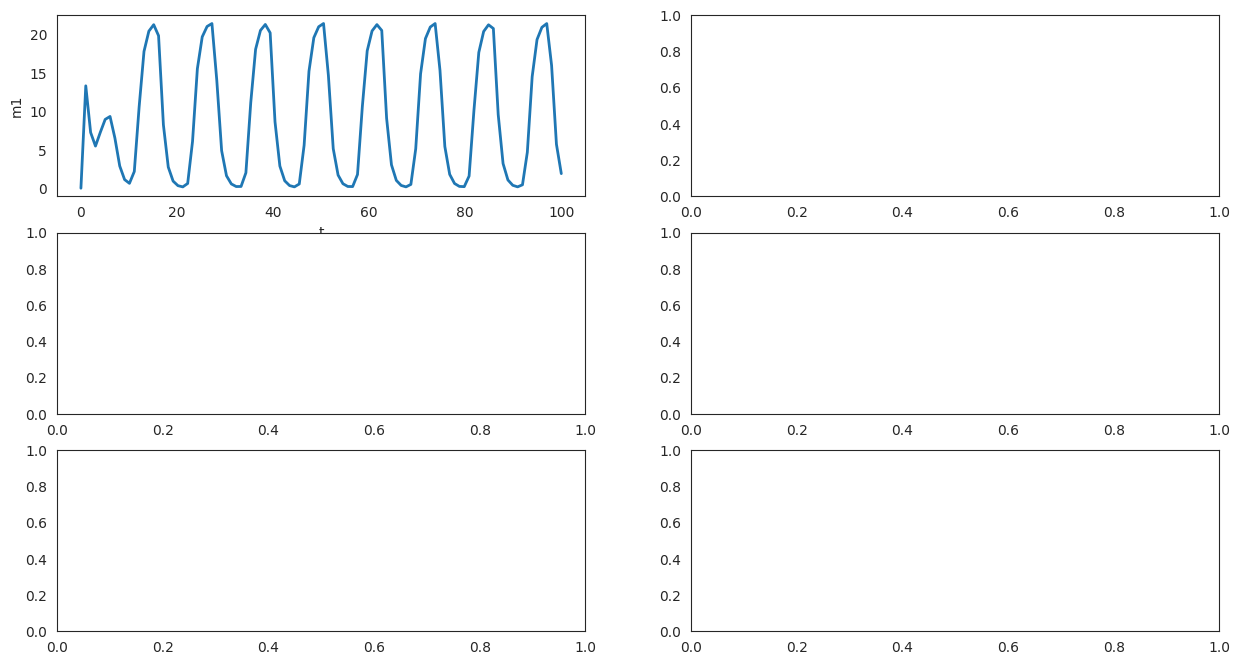

In [32]:
trysolve = solve_ode(cnn1_2p.iloc[10])
tryplot = trysolve.reshape(100,6)
# Plot real trajectories and also accepted trajectories, they overlap
fig, axs = plt.subplots(3, 2, figsize=(15, 8))
axs = axs.flatten()

variable_labels = ['m1', 'p1', 'm2', 'p2', 'm3', 'p3']
t=np.linspace(0,100,100)
for i in range(6):
    axs[i].plot(t, tryplot[:, i], label='True Data', linewidth=2)
    axs[i].set_xlabel('t')
    axs[i].set_ylabel(variable_labels[i])
    for sample in cnn1_2p:
            axs[i].plot(t, sample[:, i], 'k--', alpha=0.1)
plt.show()

In [25]:
np.linspace(0,5,2)

array([0., 5.])

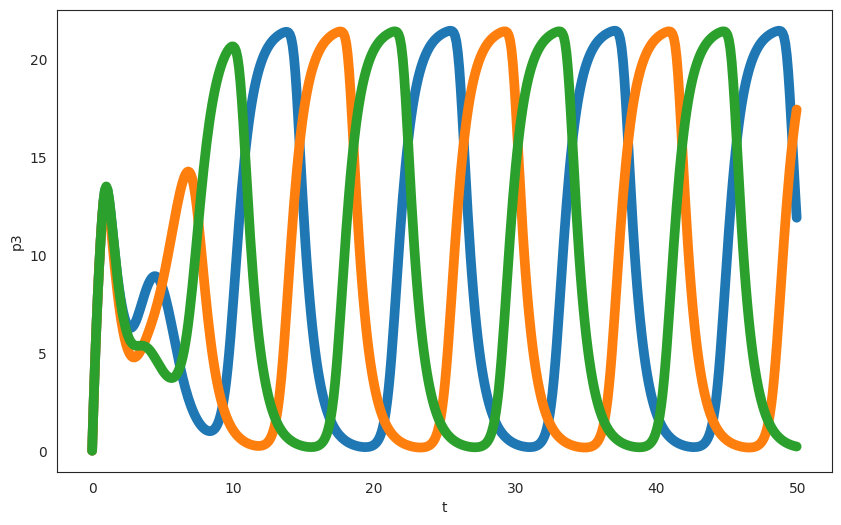

In [26]:
def solve_ode_smooth(params):
    initial_conditions = np.array([0, 2, 0, 1, 0, 3])
    solution = odeint(model, initial_conditions, t=np.linspace(0,100,1000), args=(params,)) # The initial value point should be the first element of this sequence
    return solution
trysolve = solve_ode_smooth(cnn2_2p.iloc[10])
tryplot = trysolve.reshape(1000,6)
# Plot real trajectories and also accepted trajectories, they overlap
fig, axs = plt.subplots(1,1, figsize=(10, 6))

variable_labels = ['p3']
t=np.linspace(0,100,1000)
for i in [0,2,4]:
    axs.plot(t[0:500], tryplot[0:500, i], label='True Data', linewidth=7)
axs.set_xlabel('t')
axs.set_ylabel(variable_labels[0])
plt.show()

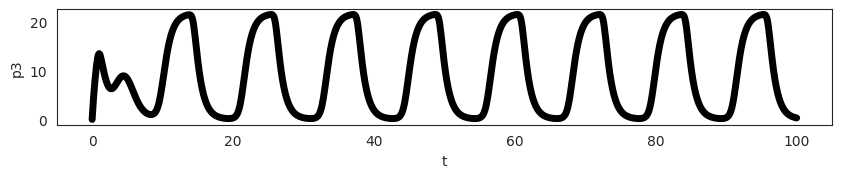

In [34]:
def solve_ode_smooth(params):
    initial_conditions = np.array([0, 2, 0, 1, 0, 3])
    solution = odeint(model, initial_conditions, t=np.linspace(0,100,1000), args=(params,)) # The initial value point should be the first element of this sequence
    return solution
trysolve = solve_ode_smooth(cnn2_2p.iloc[10])
tryplot = trysolve.reshape(1000,6)
# Plot real trajectories and also accepted trajectories, they overlap
fig, axs = plt.subplots(1,1, figsize=(10, 1.5))

variable_labels = ['p3']
t=np.linspace(0,100,1000)
axs.plot(t, tryplot[:, 0], label='True Data', linewidth=5
         , color = "black")
axs.set_xlabel('t')
axs.set_ylabel(variable_labels[0])
plt.show()

In [5]:
x_o=solve_ode([246.96291990024542,246.96291990024542])

In [16]:
cnn1_2p.iloc[1]

k1    240.17107
k2    228.28596
Name: 1, dtype: float64

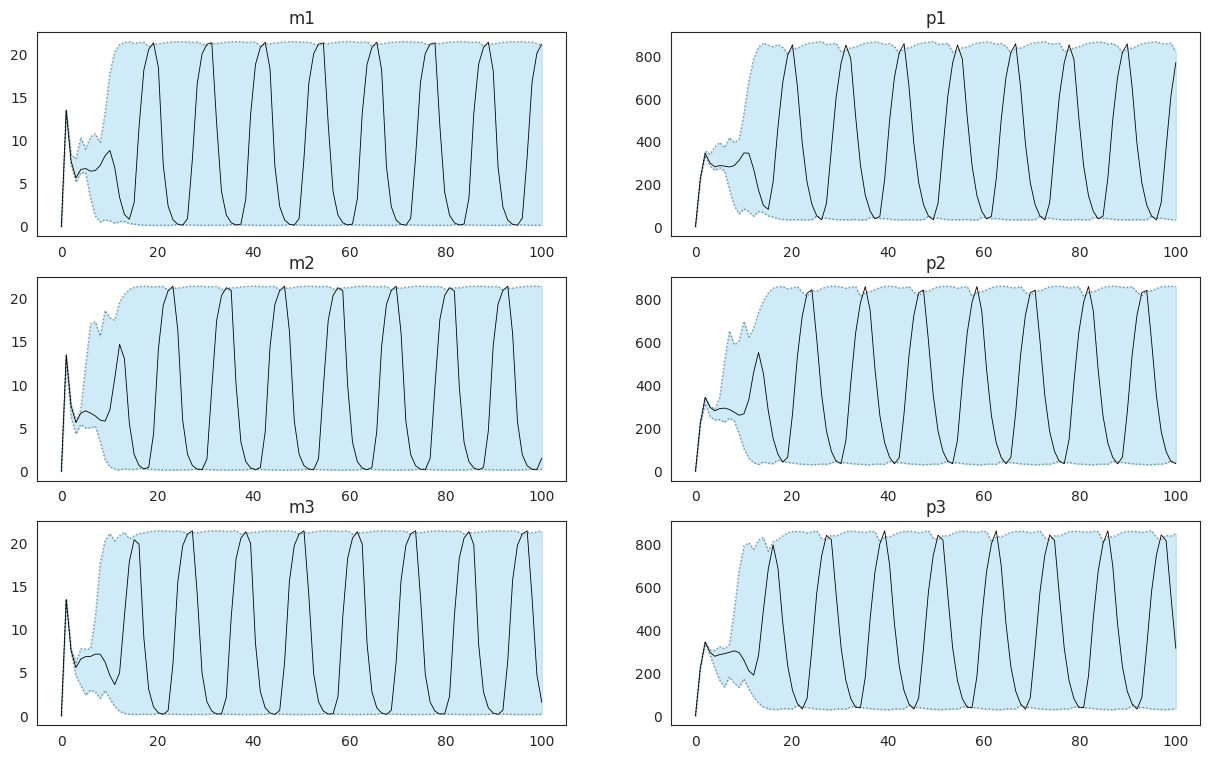

In [19]:
ppc(cnn1_2p,"ss3p2rplot")

In [6]:
def pairplot(params,true_vals,title):
    num_params=np.shape(params)[1]
    fig, ax = plt.subplots(num_params, num_params, figsize=(num_params*3, num_params*3))
    sns.set_style("white")
    for i in range(num_params):
        for j in range(num_params):
            if i != j:
                sns.kdeplot(x=params.iloc[:, j], y=params.iloc[:, i], ax=ax[i, j], cmap="Blues", fill=True)
                ax[i, j].scatter(x=true_vals[j],y=true_vals[i], marker="x", s=150, color="salmon",linewidths=4)
                ax[i, j].set_ylabel(params.columns[i])
            else:
                sns.histplot(params.iloc[:, i], ax=ax[i, j], kde=True, color="skyblue")
                ax[i, j].axvline(true_vals[i], color="salmon",linewidth=4)
            ax[i, j].set_xlabel(params.columns[j])
            #ax[i, j].set_title(params.columns[i])
    plt.tight_layout()
    plt.savefig(f"{title}_pairplot.png",dpi=700)
    plt.show()

In [45]:
true_vals[0:3]

[246.96291990024542, 246.96291990024542, 246.96291990024542]

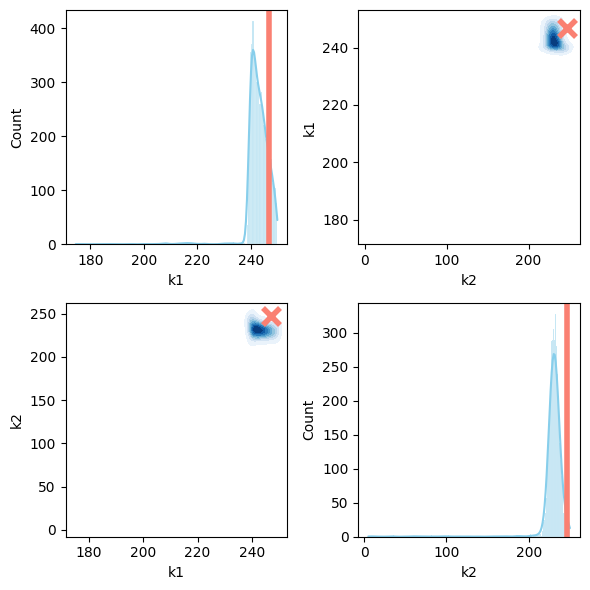

In [7]:
pairplot(cnn2_2p,true_vals[0:2],"cnn2_2p5k2r")

now scnn1pad1